<a href="https://colab.research.google.com/github/jaynetra/AIForHealthCare_Mimic3/blob/main/NLPSpacyAndSciSpacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP using Spacy

In [1]:
! pip install -U pip setuptools wheel
! pip install spacy
! python -m spacy download en_core_web_sm
! pip install scispacy
! pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 101.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz (17.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.2.4-py3-none-any.whl size=17161123 sha256=8f883305853602ae57a14e6d018157263fe563fafd6c686956789e39bf0f6074
  Stored in directory: /root/.cache/pip/wheels/dc/18/3b/52e49f4f8270f1f70676141eb4e67fcf34c01df00702f5ddb2
Successfully built en_core_sci_sm
  Attempting uninstall: en_core_sci_sm
    Found existing installation: en_core_sci_sm 0.5.4
    Uninstalling e

In [2]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_jnlpba_md-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz (14.8 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.4-py3-none-any.whl size=14778527 sha256=262d80ce14bbf936c6451926fd942470a6e8922804476cbad3ce0e4c64f9da20
  Stored in directory: /root/.cache/pip/wheels/7f/29/44/dd461872b8547b8e8007f03418fb8061f5c05c71447982bcff
Successfully built en_core_sci_sm
  Attempting uninstall: en_core_sci_sm
    Found existing installation: en_core_sci_sm 0.2.4
    Uninstalling en_core_sci_sm-0.2.4:
      Successfully uninstalled en_core_sci_sm-0.2.4
  ERROR: HTTP error 404 while getting https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.0.tar.gz
ERROR: Could not install requirement https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.0.tar.gz because of HTTP error 404 Client Error: Not Found for url: https://s3-us-west-

In [3]:
notesFromEventTable = """Admission Date:  [**2199-10-2**]              Discharge Date:   [**2199-10-6**]

Date of Birth:  [**2170-4-19**]             Sex:   M

Service: MEDICINE

Allergies:
Erythromycin Base

Attending:[**First Name3 (LF) 2234**]
Chief Complaint:
nausea, vomiting

Major Surgical or Invasive Procedure:
none


History of Present Illness:
29M with uncontrolled DM-I, erosive gastritis, and esophagitis
with multiple
prior admissions for severe gastroparesis (s/p [**First Name3 (LF) **] and gastric
pacer without relief) and UGIB who was admitted with a two day
h/o nausea, vomiting, and inability to tolerate POs.  He also
c/o mild abdominal discomfort.  He denied coffee-ground emesis,
melena, hematochezia, or hematemesis.

He also reported diaphoresis and a syncopal episode 2 days prior
to admission; he struck his head and was down for an unknown
period of time. Pt denies antecedent palpitations or chest pain.
 He reported that his blood sugar was low, but he does not
remember the exact value.
.
In ED T 100.1, HR 116, BP 139/95, 98%RA. FS 261.  Coffee-ground
emesis was noted.  He was given morphine 4 mg IV x1, Zofran 4 mg
IV x3, Protonix IV x1, Reglan 10 mg IV.  Pt refused NG lavage or
rectal exam.  KUB and CXR were unremarkable. CT abdomen showed a
markedly distended bladder; this had been seen previously and
has been attributed to autonomic dysfunction.  A Foley catheter
was placed.

He was initially admitted to the [**Hospital Unit Name 153**] in the setting of
relentless nausea and vomiting.  He stabilized within 48 hours
and was transferred to the floor.


Past Medical History:
1. Diabetes Mellitus Type I
2. Gastroparesis, failed [**Hospital Unit Name **] and gastric pacer
3. Erosive gastritis, esophagitis
4. Fe deficiency anemia
5. hypercholesterolemia
6. Hypertension
7. Chronic renal failure

Social History:
Patient lives with his wife who is very dedicated to his care.
Denies tobacco, alcohol, and illicit drug use. He is currently
unemployed and on disability.


Family History:
Paternal grandfather with [**Name (NI) 59282**]
Mother and sister with thyroid disease


Physical Exam:
VS: 99.5, 106, 170/103, 15, 98% RA
Gen: nauseous appearing male sitting in bed
HEENT: MMD, Op clear, Non elevated JVP when sitting up. Left EJ
line
CV: Tachycardic. Regular rhythm. No M/R/G. Non displaced PMI
Lungs: CTAB, no wheezes, rales or rhonchi
Abd: soft, no focal right upper quadrant pain. Mild
midepigastric tenderness. Diffuse discomfort during exam given
nausea
Ext: No LE edema, cyanosis or clubbing


Pertinent Results:
[**2199-10-2**]  WBC-7.8 RBC-4.47* Hgb-10.9* Hct-32.7* MCV-73*
MCH-24.4* MCHC-33.3 RDW-14.7 Plt Ct-413
[**2199-10-2**] 11:53PM  Hgb-10.8* Hct-33.1*
[**2199-10-3**]  WBC-10.2 RBC-3.83* Hgb-9.4* Hct-28.7* MCV-75*
MCH-24.4* MCHC-32.6 RDW-14.8 Plt Ct-382
[**2199-10-3**] 02:48PM Hct-26.6*

[**2199-10-2**] 07:00PM BLOOD PT-13.0 PTT-25.5 INR(PT)-1.1

[**2199-10-2**]  Glucose-237* UreaN-15 Creat-2.2* Na-140 K-4.5 Cl-101
HCO3-26
[**2199-10-3**] 07Glucose-212* UreaN-17 Creat-1.7* Na-138 K-4.5 Cl-104
HCO3-24  Albumin-3.8 Calcium-8.8 Phos-3.2 Mg-2.1

[**2199-10-2**] 07:00PM BLOOD ALT-58* AST-106* CK(CPK)-4027*
AlkPhos-106 Amylase-131* TotBili-0.4 Lipase-17
[**2199-10-3**] 07:21AM BLOOD ALT-43* AST-59* LD(LDH)-175 CK(CPK)-[**2215**]*
AlkPhos-87 Amylase-84 TotBili-0.3 Lipase-15

[**2199-10-2**] 07:00PM BLOOD CK 4027 CK-MB-4 cTropnT-<0.01
[**2199-10-3**] 07:21AM BLOOD CK [**2215**] CK-MB-3 cTropnT-<0.01

[**10-2**] CXR: No evidence of acute intrathoracic process.

[**2199-10-2**] KUB: No evidence of obstruction or ileus.

[**2199-10-3**] CT Abd/Pelvis: CT OF THE ABDOMEN: The lung bases are
clear. Visualized heart and pericardium appear unremarkable.
Distal esophageal thickening is unchanged and may relate to the
patient's gastroparesis or gastritis. Given the limitations of a
non-contrast study, the liver, gallbladder, adrenal glands,
spleen, pancreas, and kidneys appear normal. Hydronephrosis seen
on the previous exam has resolved. There is minimal perinephric
stranding. Loops of small and large bowel are normal in caliber
and contour. Note is made of a gastric stimulator device with a
subcutaneous component and leads extending to the anterior
surface of the stomach. Several small retroperitoneal lymph
nodes are noted, which do not meet criteria for pathological
enlargement, and there are also several small mesenteric
lymphnodes. There is no free air or free fluid.
CT OF THE PELVIS: The bladder is massively distended, but less
so than the
previous exam. The prostate is not enlarged. The seminal
vesicles and rectum appear unremarkable. The pelvic loops of
bowel appear normal. The appendix is normal. There is no free
fluid in the pelvis.
OSSEOUS STRUCTURES: There are no concerning lytic or sclerotic
lesions.
IMPRESSION:
1. No evidence of bowel abnormality.
2. Distended bladder, as seen previously.
.
[**2199-10-3**] CT Head: No evidence of acute intracranial hemorrhage.
Unchanged
appearance of the brain compared to [**2197-3-7**].
.
EKG: Sinus tachycardia rate 110.

Brief Hospital Course:
29 yo male with DM-I, severe gastroparesis refractory to
treatment (including [**Year (4 digits) **] and gastric pacer), chronic kidney
disease, and anemia, admitted with nausea, vomiting, and coffee
ground emesis likely secondary to diabetic gastroparesis and
gastritis/esophagitis.  Patient admitted to [**Hospital Unit Name 153**] on [**10-2**],
transferred to floor night of [**10-4**].

1. Nausea and Coffee-Ground Emesis: Secondary to patient's
longstanding gastroparesis and gastritis.  Although the pt
refused rectal exam and NG lavage on admission, his hematocrit
stabilized to its baseline following administration of IV
fluids.  The patient was initially kept NPO with antiemetics
including zofran, phernergan, ativan.  Morphine was given as
needed for pain.  Gastroenterology recommended stopping his
anticholinergics and increasing his Zofran to 8 mg IV QID.  This
was done.  The patient was also given suppositories to
facilitate bowel movements. He was transitioned to PO zofran and
reglan on the floor and his symptoms resolved.  hematocrit
stable throughout and no further bloody emesis.  Patient will
follow up with Dr. [**First Name8 (NamePattern2) 1158**] [**Last Name (NamePattern1) 679**] on [**10-15**] for consideration of
domperidone or ativan to help with gastroparesis.
Protonix maintained throughout, omeprazole as outpatient.

2. DM-I: FSBG was 300 on admission to ICU.  Although his
baseline Lantus and HISS were initially continued, [**Last Name (un) **] was
consulted; the patient's Lantus was thereafter given at night,
and his HISS was changed to a RISS (because he has diabetic
gastroparesis).  After the regimen change, he was hypoglycemic
overnight.  D5-containing IV fluids were started; there was no
anion gap, but ketones were found in the urine.  His Lantus was
decreased to 20 units QHS, and his sliding scale continued.  On
[**10-5**] patient maintained on D5 drip and began taking clears.
[**10-5**] lost IV access and not given Lantus (incident report
filed).  Patient able to take good PO by [**10-6**] AM and no need for
access. Given NPH 10 units AM of [**10-6**] for basal insulin and then
planned re-start of home lantus dosing on [**10-6**] evening, night of
discharge.  Has [**Last Name (un) **] follow up.  Of note, did have low blood
sugar on [**10-6**] but after juice, up to 140.  Patient instructed to
monitor blood sugars closely overnight, he did not want to stay
for monitoring and felt he was going to have good PO intake at
home and would monitor closely.

3. HTN:  The patient takes valsartan and metoprolol at home;
initially held in [**Hospital Unit Name 153**].  Re-started with PO intake on [**10-5**].

4. Sinus tachycardia: Likely due to hypovolemia and discomfort.
Improved with ivf's and control of gastroparesis.

5. Acute Renal Failure/Chronic Kidney Disease: Most likely
prerenal due to vomiting, improved with fluids.  Creatinine 1.8
on discharge, which is recent baseline.
.
6. Fall/Rhabdomyolysis: The patient's CK was over 4000 on
admission.  This is likely due to his recent syncopal episode,
fall, and unknown period of time being down.  His CK continues
to trend down rapidly; it was 900 this morning.  His liver
enzymes were also abnormal on admission but normalized.  A head
CT (s/p fall) showed no evidence of an acute intracranial
process.  CK down to 400 by [**10-5**].  MB's and troponins negative.

7. GERD: PPI continued

8. Transaminitis: resolved with treatment of gastroparesis.

9. anemia: chronic disease, stable throughout.

Medications on Admission:
Folic Acid 1 mg daily
Thiamine HCl 100 mg daily
Senna 8.6 mg po bid
Docusate Sodium 100 mg po bid
Valsartan 80 mg po bid
Metoclopramide 10 mg PO QIDACHS
Ondansetron 8 mg Tablet, Rapid Dissolve po q8h*
Omeprazole 20 mg po daily
Toprol XL 25 mg po daily
Insulin Glargine - 25 units at bedtime- as per pt
Insulin [**Name (NI) **] per insulin sliding scale

Discharge Medications:

Discharge Disposition:
Home

Discharge Diagnosis:
gastroparesis
upper GI bleed

secondary diagnosis:
diabetes mellitus type I
gastritis
chronic renal insufficiency
hypertension


Discharge Condition:
stable, tolerating food, ambulating


Discharge Instructions:
You admitted with gastroparesis and blood in your vomit.  We
gave you medications for your nausea and intravenous fluids.
Gastroeneterology saw you while you were in the hospital.

Please call 911 or return to the hospital if you experience
fevers, abdominal pain, nausea, vomiting, unable to take
food/drink, vomiting blood, blood in stools or other concerning
symptoms.

Followup Instructions:
Please schedule a follow-up appointment with Dr. [**Last Name (STitle) **] within 1
week after leaving the hospital.

You have the following scheduled appointments:
Provider: [**First Name11 (Name Pattern1) **] [**Last Name (NamePattern1) 7212**], MD Phone:[**Telephone/Fax (1) 250**]
Date/Time:[**2199-11-12**] 4:00



"""



In [4]:
# we will compare total number of sentence, types of labels from spacy and scispacy for the notes above
import spacy
import scispacy


def create_nlp_and_get_unique_labels(model_name,text):
  """
  Creates an NLP object with the specified model and extracts unique entity labels.

  Args:
    model_name: The name of the spaCy model to load.

  Returns:
    A tuple containing the NLP object and a set of unique entity labels.
  """
  nlp = spacy.load(model_name)  # Load the specified spaCy model
  doc = nlp(text)  # Process a dummy text to get entities
  unique_labels = set([ent.label_ for ent in doc.ents])  # Extract unique labels
  return doc, unique_labels

In [5]:
docs, unique_labels = create_nlp_and_get_unique_labels("en_core_web_sm",notesFromEventTable)
print(unique_labels)

{'WORK_OF_ART', 'ORDINAL', 'ORG', 'PRODUCT', 'TIME', 'PERCENT', 'FAC', 'NORP', 'GPE', 'CARDINAL', 'PERSON', 'DATE'}


In [6]:
# Visualize with dispacy
from spacy import displacy

# Assuming you have already processed your text and have the 'doc' object:

displacy.render(docs, style="ent", jupyter=True)

In [7]:
docsci, unique_labels = create_nlp_and_get_unique_labels("en_ner_bc5cdr_md",notesFromEventTable)
print(unique_labels)

/usr/local/lib/python3.11/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


{'CHEMICAL', 'DISEASE'}


In [8]:
# Visualize with dispacy
from spacy import displacy

# Assuming you have already processed your text and have the 'doc' object:

displacy.render(docsci, style="ent", jupyter=True)

In [9]:
#compare sentences in the doc
print('Spacy Number of sentences = ',len(list(docs.sents)))
print('SciSpacy Number of sentences = ',len(list(docsci.sents)))

Spacy Number of sentences =  149
SciSpacy Number of sentences =  109


In [10]:
# dependence tree

sentence_spans = list(docs.sents)
displacy.render(sentence_spans[0], style="dep", jupyter=True)

In [11]:
sentence_spans = list(docsci.sents)
displacy.render(sentence_spans[0], style="dep", jupyter=True)

Moving on to word2vec and t_sne plots

In [12]:

!pip install gensim

In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

Build a corpos from the tokens from doc.ecnt

In [14]:
# prompt: get a list of tokens from the doc.ent.text and put it in a list and store in a varioble called corpus use list comprehension

tokens = docs.ents
corpus = [[token.text for token in tokens]]


In [15]:
#build a word2vec on this corpus
from gensim.models import Word2Vec
model = Word2Vec(corpus,  min_count=1)

In [16]:
model.wv['Insulin']

array([-4.2663608e-03, -9.2750937e-03, -1.8895867e-03, -3.7201054e-03,
        9.1353077e-03,  2.8212415e-03, -5.8835181e-03, -3.2232897e-03,
       -9.9495975e-03,  1.8741502e-03, -3.9889826e-03, -2.8056130e-03,
        5.1850667e-03,  7.6289936e-03,  4.4403467e-03, -6.8123629e-03,
        6.7174658e-03, -9.6688783e-03, -6.9686407e-03, -8.1725428e-03,
       -2.2307772e-03,  4.8437284e-04, -3.7841247e-03,  1.8271967e-03,
        9.2035150e-03,  6.6995365e-03, -1.0839805e-03,  9.0821991e-03,
        1.5274943e-03, -2.0262424e-03, -6.5096780e-03,  6.4705703e-03,
       -9.0370923e-03, -1.9286135e-03,  7.6770349e-03, -2.5099667e-03,
        1.6734978e-03, -7.3549598e-03,  5.0067757e-03,  7.3025962e-03,
       -9.2509268e-03, -3.3491543e-03,  7.8123114e-03,  2.9161947e-03,
        5.9407939e-05,  3.1906256e-04, -9.9369744e-03,  9.9300649e-03,
       -1.9858216e-03, -4.8792106e-03,  2.7355810e-03,  1.0594598e-03,
       -5.8883163e-03,  5.7651768e-03, -2.4560180e-03, -6.1497842e-03,
      

In [17]:
model.wv.most_similar('Insulin')

[('679', 0.2515358626842499),
 ('250', 0.21332472562789917),
 ('FS', 0.17466948926448822),
 ('CK', 0.1732712835073471),
 ('300', 0.17130617797374725),
 ('Zofran 4', 0.15393108129501343),
 ('Senna', 0.14903883635997772),
 ('D5', 0.1374814212322235),
 ('6', 0.13224667310714722),
 ('400', 0.12658566236495972)]

In [18]:
#t_SNE Plot
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


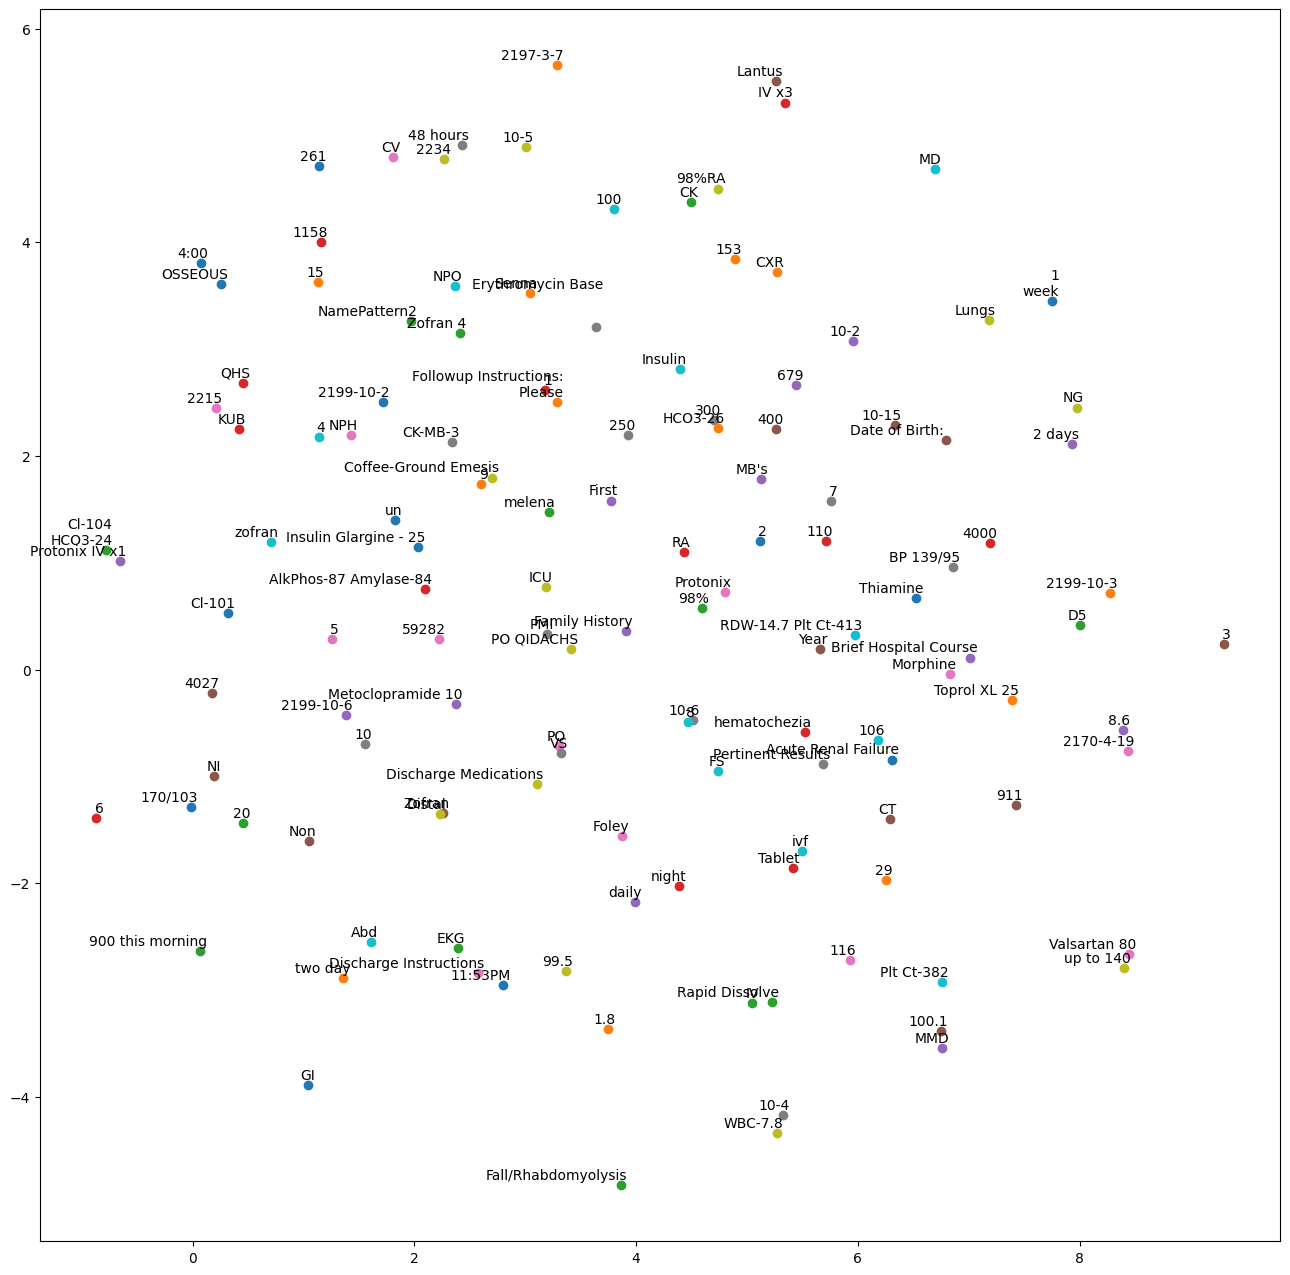

In [19]:
vocabs = model.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model,new_v)